In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
dataset=pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
dataset.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
mat_corr=dataset.corr()

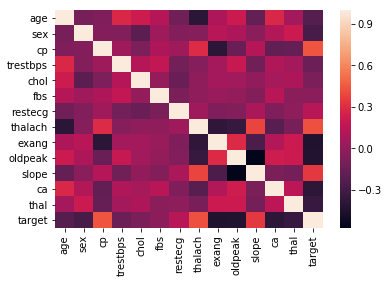

In [8]:
sns.heatmap(mat_corr)

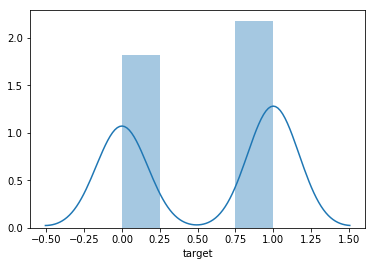

In [9]:
sns.distplot(dataset['target'],kde=True)

In [10]:
print('Skewness of the target id  {}'.format(dataset['target'].skew()))

Skewness of the target id  -0.17982105403495655


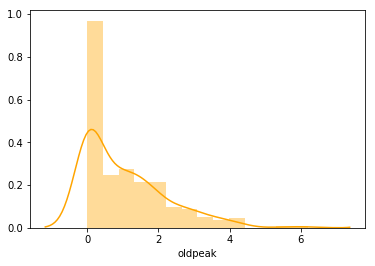

In [11]:
sns.distplot(dataset['oldpeak'],kde='True',color='orange')

In [12]:
print(dataset['oldpeak'].skew())

1.269719930601997


<Figure size 720x360 with 0 Axes>

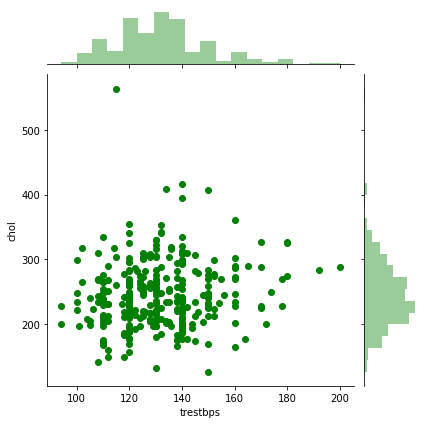

In [13]:
plt.figure(figsize=(10,5))
sns.jointplot(x=dataset['trestbps'],y=dataset['chol'],color='green')

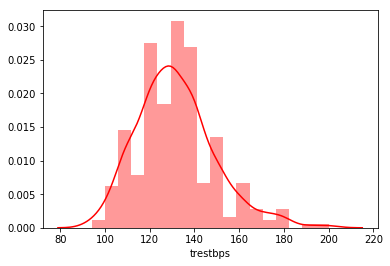

In [14]:
sns.distplot(dataset['trestbps'],kde=True,color='red')

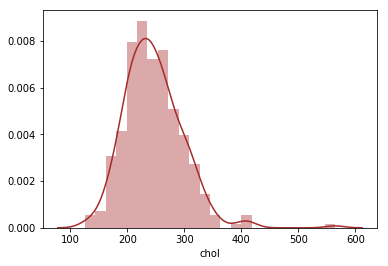

In [15]:
sns.distplot(dataset['chol'],kde=True,color='brown')

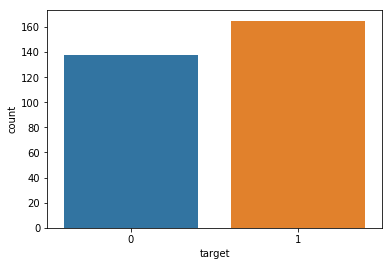

In [16]:
sns.countplot(dataset['target'],label='Target')

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,classification_report

In [18]:
X=dataset.drop('target',axis=1)
y=dataset['target'].values

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [21]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
y_pred=model.predict(X_test)

In [23]:
df=pd.DataFrame({'Actual prediction ':y_test,'Predicted Value ':y_pred})
df1=df.head(25)
print(df1)

    Actual prediction   Predicted Value 
0                    0                 0
1                    1                 1
2                    0                 0
3                    0                 0
4                    0                 0
5                    0                 0
6                    0                 0
7                    1                 1
8                    0                 0
9                    1                 1
10                   1                 1
11                   0                 0
12                   0                 1
13                   0                 0
14                   0                 0
15                   0                 1
16                   1                 1
17                   0                 0
18                   1                 1
19                   0                 1
20                   1                 1
21                   0                 0
22                   1                 1
23              

In [24]:
print(confusion_matrix(y_test,y_pred))

[[24  6]
 [ 5 26]]


In [25]:
print(accuracy_score(y_test,y_pred)*100)
print(r2_score(y_test,y_pred))

81.9672131147541
0.27849462365591393


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        30
           1       0.81      0.84      0.83        31

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [27]:

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.18032786885245902
Mean Squared Error: 0.18032786885245902
Root Mean Squared Error: 0.4246502900652006


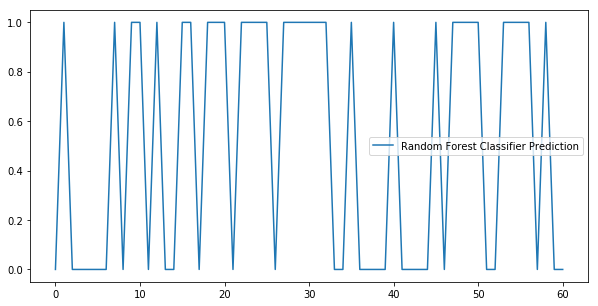

In [28]:
plt.figure(figsize=(10,5))
m=y_pred
plt.plot(m,label='Random Forest Classifier Prediction')
plt.legend()
plt.show()